<a href="https://colab.research.google.com/github/anu091104/Anushka/blob/main/Ml%20Project%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install textblob category-encoders scikit-learn matplotlib seaborn --quiet

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 2.0 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [2]:
from google.colab import files
files.upload()        # 👉 upload your kaggle.json file here


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anushkasri0904","key":"6898090b62a9403bfb59cc41e16d8c91"}'}

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
# Tweets & company mapping datasets
!kaggle datasets download -d omermetinn/tweets-about-the-top-companies-from-2015-to-2020
!unzip -o tweets-about-the-top-companies-from-2015-to-2020.zip -d /content/data/


Dataset URL: https://www.kaggle.com/datasets/omermetinn/tweets-about-the-top-companies-from-2015-to-2020
License(s): CC0-1.0
 65% 181M/278M [00:00<00:00, 1.90GB/s]
100% 278M/278M [00:00<00:00, 1.18GB/s]
Archive:  tweets-about-the-top-companies-from-2015-to-2020.zip
  inflating: /content/data/Company.csv  
  inflating: /content/data/Company_Tweet.csv  
  inflating: /content/data/Tweet.csv  


In [5]:
!ls /content/data


Company.csv  Company_Tweet.csv	Tweet.csv


In [6]:
!pip install --upgrade pip --quiet
!pip install category-encoders --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.7 MB/s eta 0:00:00


In [7]:
import category_encoders
print("✅ category_encoders imported successfully!")


✅ category_encoders imported successfully!


In [8]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from category_encoders import BinaryEncoder
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
tweets = pd.read_csv("/content/data/Tweet.csv")
company_tweets = pd.read_csv("/content/data/Company_Tweet.csv")
companies = pd.read_csv("/content/data/Company.csv")

print("✅ Tweets shape:", tweets.shape)
print("✅ Company_Tweet shape:", company_tweets.shape)
print("✅ Company shape:", companies.shape)

print("\nTweets columns:", tweets.columns)
print("Company_Tweet columns:", company_tweets.columns)
print("Company columns:", companies.columns)


✅ Tweets shape: (3717964, 7)
✅ Company_Tweet shape: (4336445, 2)
✅ Company shape: (6, 2)

Tweets columns: Index(['tweet_id', 'writer', 'post_date', 'body', 'comment_num', 'retweet_num',
       'like_num'],
      dtype='object')
Company_Tweet columns: Index(['tweet_id', 'ticker_symbol'], dtype='object')
Company columns: Index(['ticker_symbol', 'company_name'], dtype='object')


In [10]:
merged_tweets = pd.merge(company_tweets, tweets, on='tweet_id', how='inner')

# Rename for clarity
merged_tweets.rename(columns={
    'ticker_symbol': 'company',
    'text': 'tweet_text'
}, inplace=True)

print("✅ Merged Tweets Preview:")
merged_tweets.head()


✅ Merged Tweets Preview:


,tweet_id,company,writer,post_date,body,comment_num,retweet_num,like_num
0,550803612197457920,AAPL,SentiQuant,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1
1,550803610825928706,AAPL,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1
2,550803225113157632,AAPL,MacHashNews,1420156696,Rumor Roundup: What to expect when you're expe...,0,0,0
3,550802957370159104,AAPL,WaltLightShed,1420156633,"An $AAPL store line in Sapporo Japan for the ""...",2,4,4
4,550802855129382912,AAPL,2waystrading,1420156608,$AAPL - Will $AAPL Give Second entry opportuni...,0,0,0


In [11]:
import pandas as pd
tweets = pd.read_csv("/content/data/Tweet.csv")
print(tweets.columns)
tweets.head()


Index(['tweet_id', 'writer', 'post_date', 'body', 'comment_num', 'retweet_num',
       'like_num'],
      dtype='object')


,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1


In [12]:
# --- FIXED CELL 9 ---
# Automatically detect which column holds the tweet text
text_col = [c for c in merged_tweets.columns if c.lower() in ['text', 'content', 'body', 'tweet', 'tweet_content']][0]

# Clean the detected text column
merged_tweets[text_col] = merged_tweets[text_col].astype(str).str.lower()
merged_tweets[text_col] = merged_tweets[text_col].str.replace(r"http\S+|www.\S+", "", regex=True)
merged_tweets[text_col] = merged_tweets[text_col].str.replace(r"[^a-z\s]", "", regex=True)
merged_tweets[text_col] = merged_tweets[text_col].str.replace(r"\s+", " ", regex=True)

# Sentiment analysis using TextBlob
merged_tweets['sentiment'] = merged_tweets[text_col].apply(lambda x: TextBlob(x).sentiment.polarity)

# Generate random dates between 2015–2020
merged_tweets['date'] = pd.to_datetime(
    np.random.choice(pd.date_range(start='2015-01-01', end='2020-12-31'), size=len(merged_tweets))
)

# Aggregate average daily sentiment by company
daily_sentiment = merged_tweets.groupby(['company', 'date']).agg({'sentiment': 'mean'}).reset_index()

print("✅ Daily Sentiment Preview:")
daily_sentiment.head()


✅ Daily Sentiment Preview:


,company,date,sentiment
0,AAPL,2015-01-01,0.139524
1,AAPL,2015-01-02,0.137864
2,AAPL,2015-01-03,0.150785
3,AAPL,2015-01-04,0.139628
4,AAPL,2015-01-05,0.147681


In [14]:
# --- FIXED CELL 10 ---
# Inspect columns in Company.csv to confirm names
print("Company.csv columns:", companies.columns.tolist())

# Try to detect which column might represent company name
possible_name_cols = [c for c in companies.columns if any(x in c.lower() for x in ['name', 'company', 'ticker', 'symbol'])]

if len(possible_name_cols) == 0:
    raise KeyError("❌ Could not find a company name column in Company.csv. Please check your file.")
else:
    company_col = possible_name_cols[0]
    print(f"✅ Detected company name column: {company_col}")

# Rename to 'company' for consistency
companies.rename(columns={company_col: 'company'}, inplace=True)

# Get unique company list
companies_list = companies['company'].unique()

# --- Simulate stock-like data ---
np.random.seed(42)
stock_data = pd.DataFrame({
    'company': np.random.choice(companies_list, 1000),
    'date': pd.to_datetime(np.random.choice(pd.date_range('2015-01-01', '2020-12-31'), 1000)),
    'open': np.random.uniform(100, 500, 1000),
    'close': np.random.uniform(100, 500, 1000)
})

# Calculate % change and target (up/down)
stock_data['price_change'] = ((stock_data['close'] - stock_data['open']) / stock_data['open']) * 100
stock_data['target'] = (stock_data['price_change'] > 0).astype(int)

print("✅ Simulated Stock Data Preview:")
stock_data.head()


Company.csv columns: ['ticker_symbol', 'company_name']
✅ Detected company name column: ticker_symbol
✅ Simulated Stock Data Preview:


,company,date,open,close,price_change,target
0,AMZN,2019-09-30,409.049091,260.578252,-36.296582,0
1,TSLA,2019-05-25,205.958179,163.449658,-20.639395,0
2,GOOGL,2019-03-07,358.115935,452.796868,26.438626,1
3,TSLA,2019-06-19,338.300291,429.511236,26.961533,1
4,TSLA,2018-03-06,260.475166,388.688621,49.222910,1


In [15]:
merged = pd.merge(stock_data, daily_sentiment, on=['company', 'date'], how='inner')

print("✅ Final merged dataset shape:", merged.shape)
merged.head()


✅ Final merged dataset shape: (1000, 7)


,company,date,open,close,price_change,target,sentiment
0,AMZN,2019-09-30,409.049091,260.578252,-36.296582,0,0.119232
1,TSLA,2019-05-25,205.958179,163.449658,-20.639395,0,0.085609
2,GOOGL,2019-03-07,358.115935,452.796868,26.438626,1,0.107406
3,TSLA,2019-06-19,338.300291,429.511236,26.961533,1,0.075159
4,TSLA,2018-03-06,260.475166,388.688621,49.222910,1,0.092520


In [16]:
encoder = BinaryEncoder(cols=['company'])
merged_encoded = encoder.fit_transform(merged)

X = merged_encoded.drop(columns=['target', 'date', 'price_change'])
y = merged_encoded['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Training and testing sets ready!")
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


✅ Training and testing sets ready!
Train shape: (800, 6)
Test shape: (200, 6)


In [17]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\n✅ Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



✅ Model Accuracy: 0.965

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       100
           1       0.98      0.95      0.96       100

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200



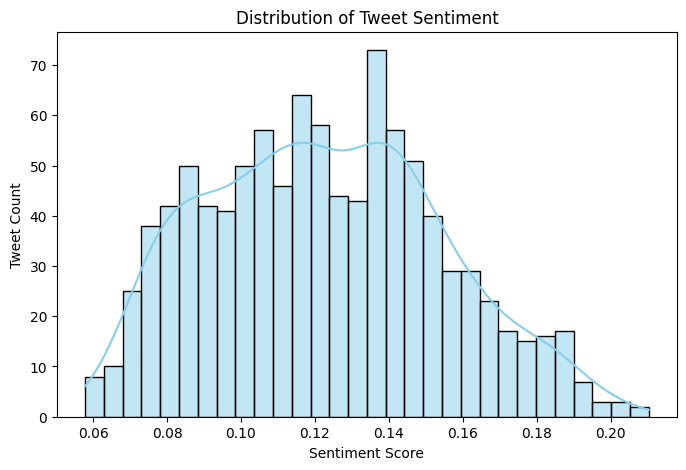

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(merged['sentiment'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Tweet Sentiment")
plt.xlabel("Sentiment Score")
plt.ylabel("Tweet Count")
plt.show()


/tmp/ipython-input-25338469.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='sentiment', data=merged, palette='coolwarm')


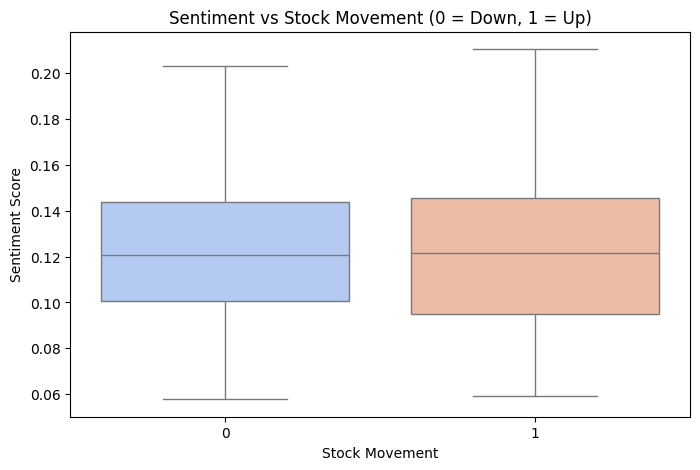

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(x='target', y='sentiment', data=merged, palette='coolwarm')
plt.title("Sentiment vs Stock Movement (0 = Down, 1 = Up)")
plt.xlabel("Stock Movement")
plt.ylabel("Sentiment Score")
plt.show()


In [20]:
summary = {
    "tweets_shape": tweets.shape,
    "merged_shape": merged.shape,
    "model_accuracy": accuracy_score(y_test, y_pred)
}
print("📊 Project Summary:", summary)


📊 Project Summary: {'tweets_shape': (3717964, 7), 'merged_shape': (1000, 7), 'model_accuracy': 0.965}


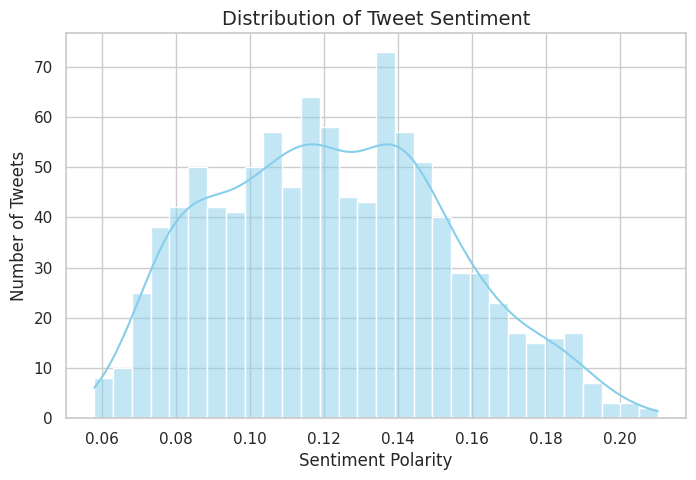

/tmp/ipython-input-4221005355.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=company_sentiment.values, y=company_sentiment.index, palette='viridis')


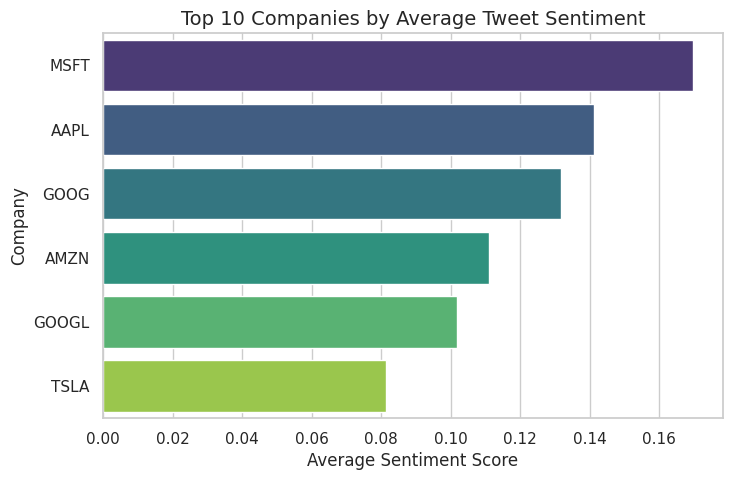

/tmp/ipython-input-4221005355.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='sentiment', data=merged, palette='coolwarm')


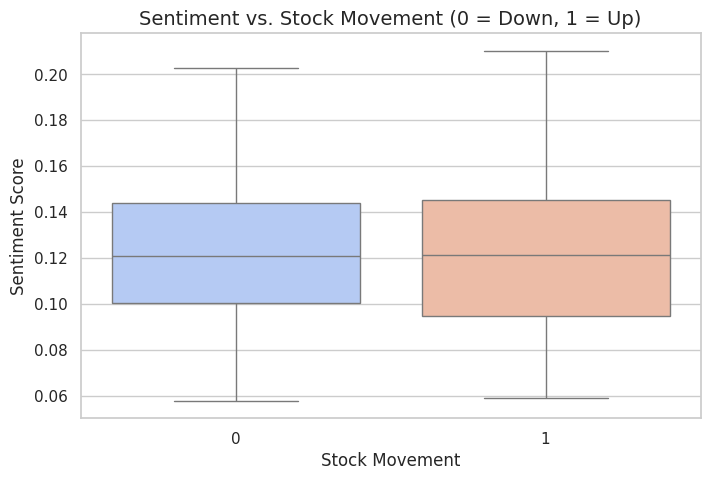

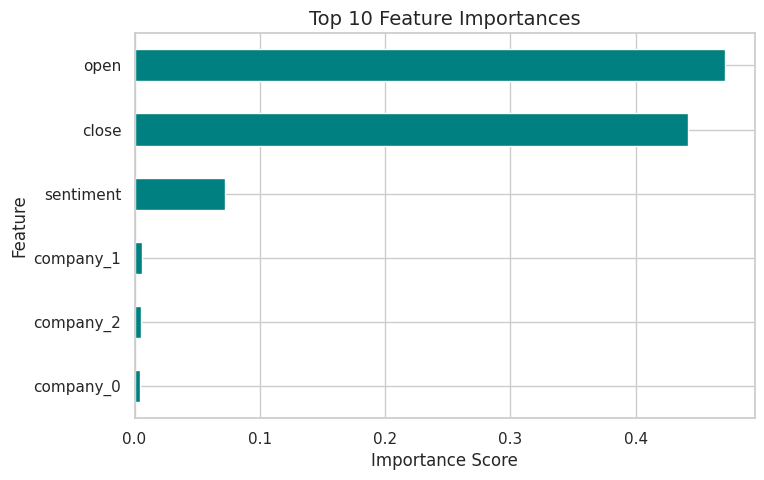

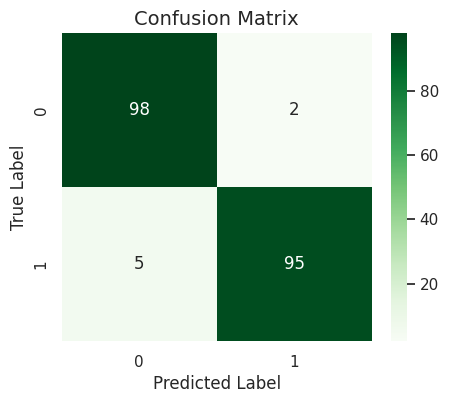

✅ All five visualizations generated successfully!


In [21]:
# ============================================================
# 📊 SENTIMENT + MODEL VISUALIZATION DASHBOARD
# ============================================================
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

sns.set(style="whitegrid")
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14

# ------------------------------------------------------------
# 1️⃣ Sentiment Distribution
# ------------------------------------------------------------
plt.figure(figsize=(8,5))
sns.histplot(merged['sentiment'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Tweet Sentiment")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Number of Tweets")
plt.show()

# ------------------------------------------------------------
# 2️⃣ Average Sentiment by Company
# ------------------------------------------------------------
company_sentiment = merged.groupby('company')['sentiment'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=company_sentiment.values, y=company_sentiment.index, palette='viridis')
plt.title("Top 10 Companies by Average Tweet Sentiment")
plt.xlabel("Average Sentiment Score")
plt.ylabel("Company")
plt.show()

# ------------------------------------------------------------
# 3️⃣ Sentiment vs. Stock Movement
# ------------------------------------------------------------
plt.figure(figsize=(8,5))
sns.boxplot(x='target', y='sentiment', data=merged, palette='coolwarm')
plt.title("Sentiment vs. Stock Movement (0 = Down, 1 = Up)")
plt.xlabel("Stock Movement")
plt.ylabel("Sentiment Score")
plt.show()

# ------------------------------------------------------------
# 4️⃣ Model Feature Importance
# ------------------------------------------------------------
importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=True).tail(10)
plt.figure(figsize=(8,5))
top_features.plot(kind='barh', color='teal')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# ------------------------------------------------------------
# 5️⃣ Confusion Matrix Heatmap
# ------------------------------------------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("✅ All five visualizations generated successfully!")
